In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import random

In [2]:
df = pd.read_csv("avocado.csv")
df.head(4)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany


In [3]:
for i in df.columns:
    if df[i].nunique() < 2:
        df.drop(i,axis=1,inplace=True)
        print(f"{i} column is dropped from the dataframe")

In [4]:
df.sort_values("Date",inplace=True)

In [5]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


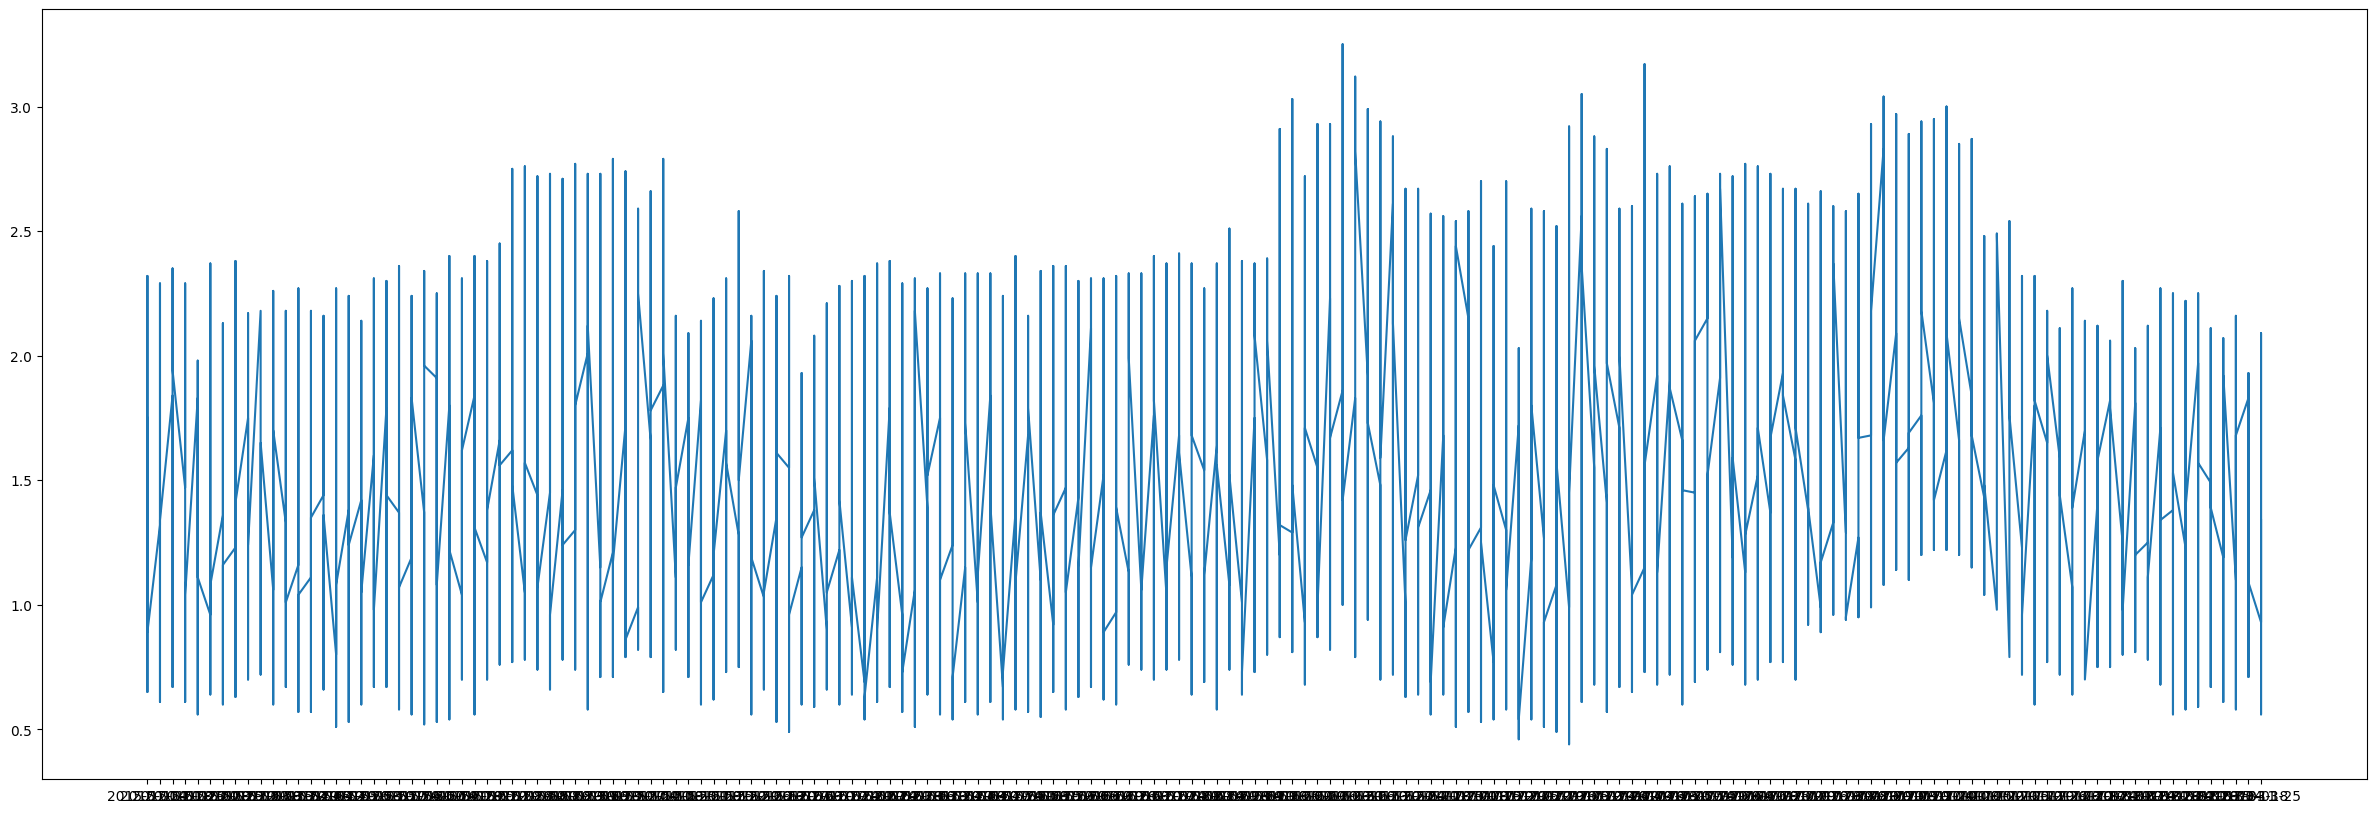

In [6]:
plt.figure(figsize=(30,10))
plt.plot(df['Date'],df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

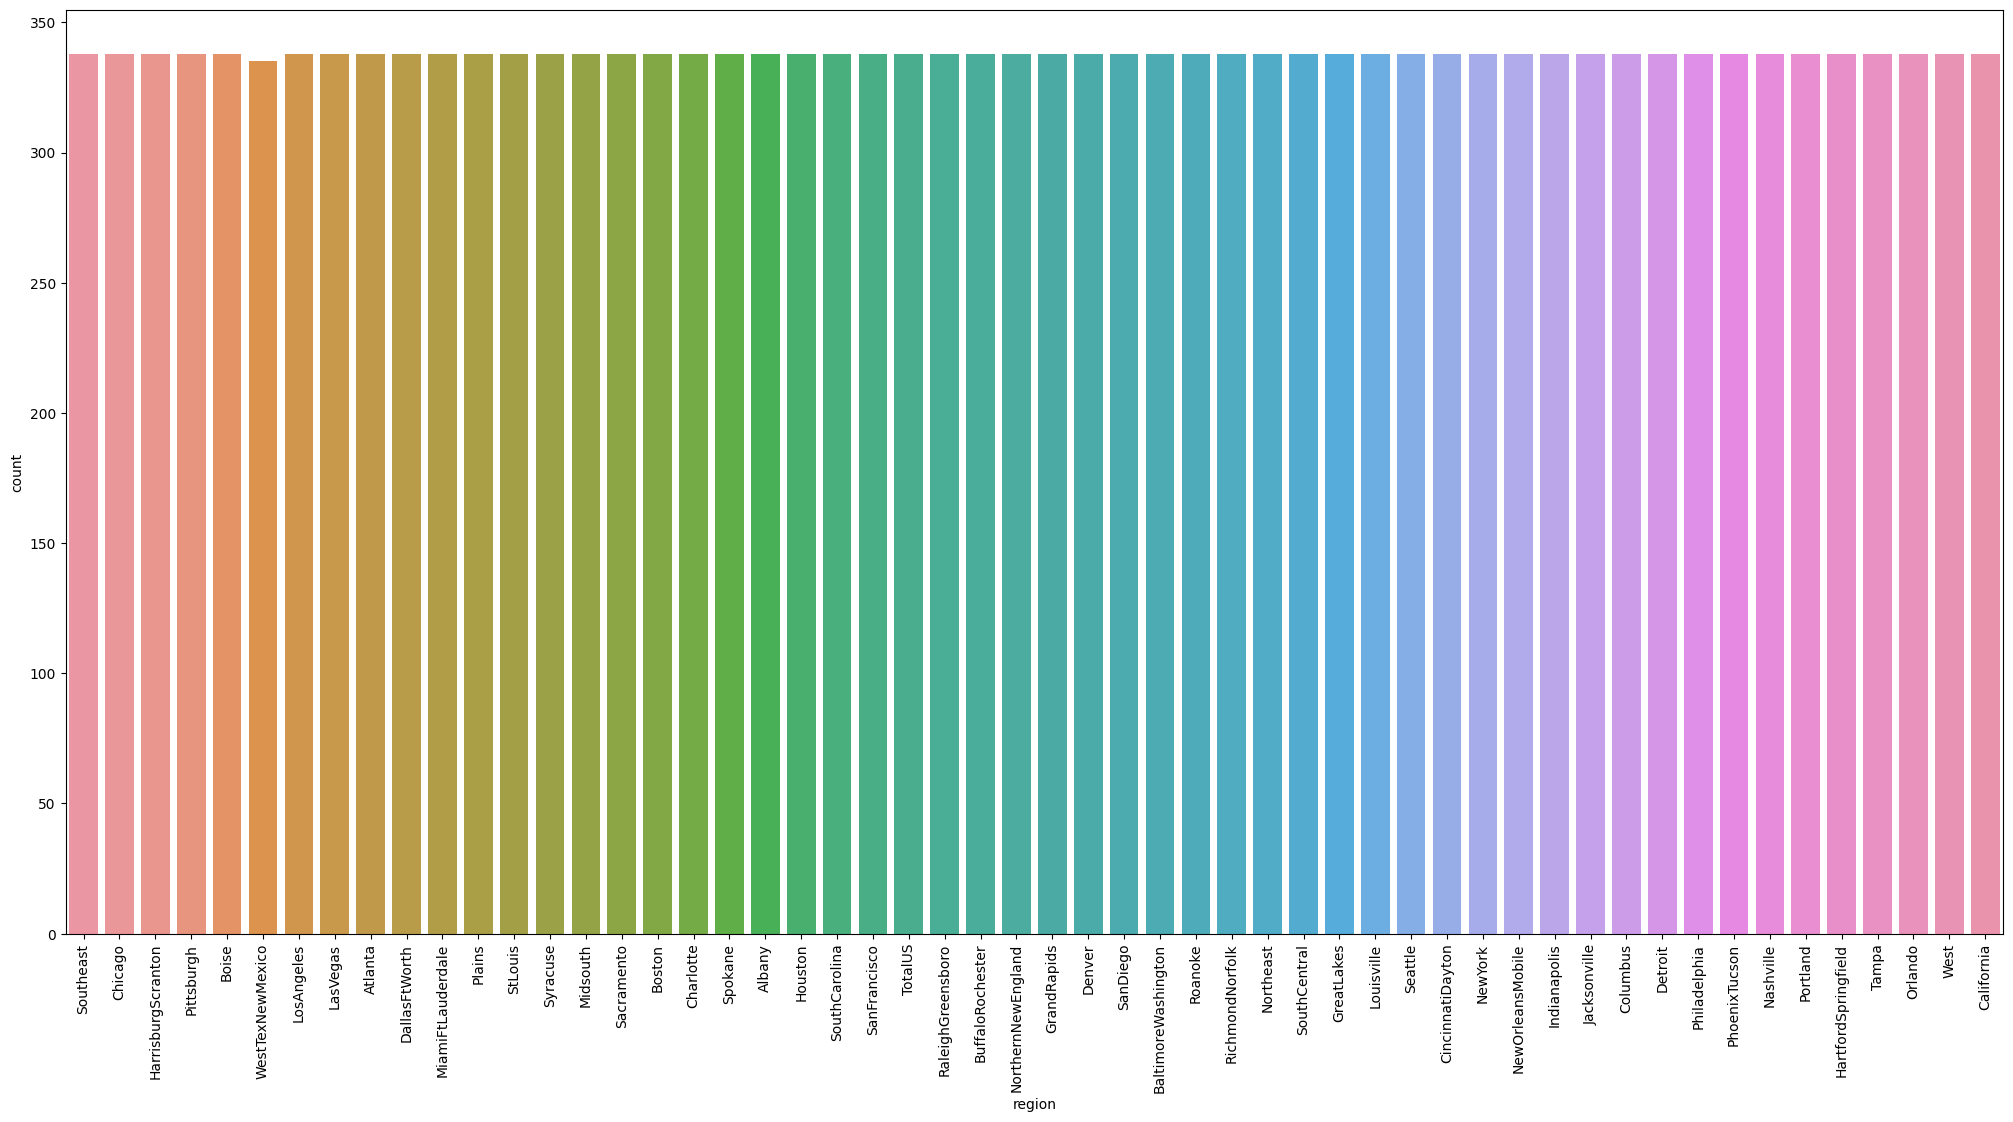

In [7]:
plt.figure(figsize=[25,12])
sns.countplot(x='region',data=df)
plt.xticks(rotation=90)

<AxesSubplot: xlabel='year', ylabel='count'>

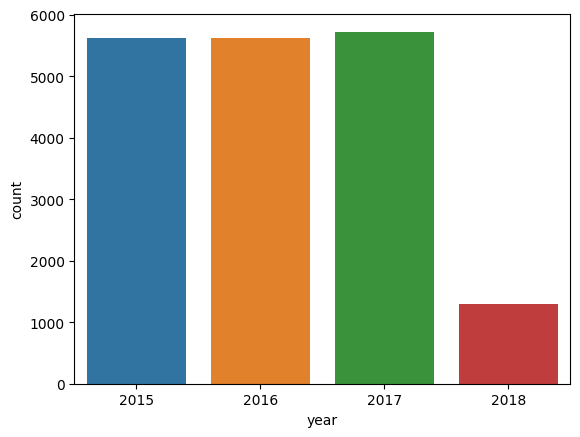

In [8]:
sns.countplot(x='year',data=df)

In [9]:
avocado_prophet = df[['Date','AveragePrice']]
avocado_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [12]:
avocado_prophet.rename(columns={"Date":'ds',"AveragePrice":'y'},inplace=True)
avocado_prophet

C:\Users\Amr\AppData\Local\Temp\ipykernel_10768\1633000119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_prophet.rename(columns={"Date":'ds',"AveragePrice":'y'},inplace=True)


,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [13]:
m = Prophet()

In [14]:
m.fit(avocado_prophet)

17:36:33 - cmdstanpy - INFO - Chain [1] start processing
17:36:43 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498517,0.885606,1.862071,1.498517,1.498517,-0.113702,-0.113702,-0.113702,-0.113702,-0.113702,-0.113702,0.0,0.0,0.0,1.384815
1,2015-01-11,1.493341,0.887894,1.908734,1.493341,1.493341,-0.105274,-0.105274,-0.105274,-0.105274,-0.105274,-0.105274,0.0,0.0,0.0,1.388067
2,2015-01-18,1.488165,0.907735,1.862319,1.488165,1.488165,-0.104955,-0.104955,-0.104955,-0.104955,-0.104955,-0.104955,0.0,0.0,0.0,1.383211
3,2015-01-25,1.482990,0.843601,1.858386,1.482990,1.482990,-0.123919,-0.123919,-0.123919,-0.123919,-0.123919,-0.123919,0.0,0.0,0.0,1.359070
4,2015-02-01,1.477814,0.826407,1.799230,1.477814,1.477814,-0.152293,-0.152293,-0.152293,-0.152293,-0.152293,-0.152293,0.0,0.0,0.0,1.325521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.167515,0.528352,1.601643,0.980308,1.350232,-0.086476,-0.086476,-0.086476,-0.086476,-0.086476,-0.086476,0.0,0.0,0.0,1.081039
530,2019-03-22,1.166795,0.545633,1.616723,0.978534,1.350114,-0.084782,-0.084782,-0.084782,-0.084782,-0.084782,-0.084782,0.0,0.0,0.0,1.082013
531,2019-03-23,1.166076,0.566624,1.611650,0.976764,1.349759,-0.082813,-0.082813,-0.082813,-0.082813,-0.082813,-0.082813,0.0,0.0,0.0,1.083263
532,2019-03-24,1.165356,0.552194,1.598707,0.975039,1.349403,-0.080588,-0.080588,-0.080588,-0.080588,-0.080588,-0.080588,0.0,0.0,0.0,1.084768


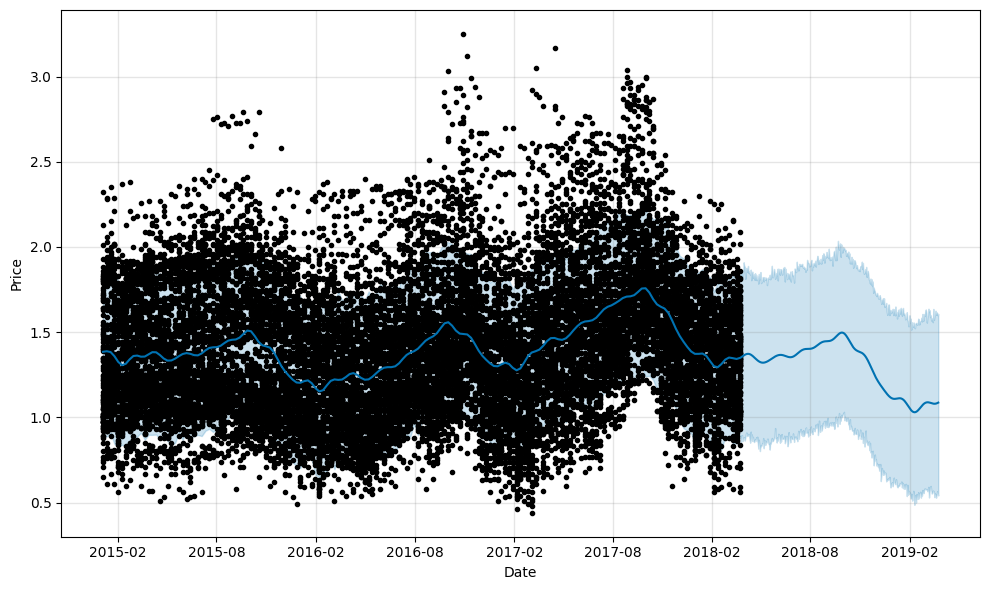

In [17]:
figure = m.plot(forecast,xlabel='Date',ylabel="Price")

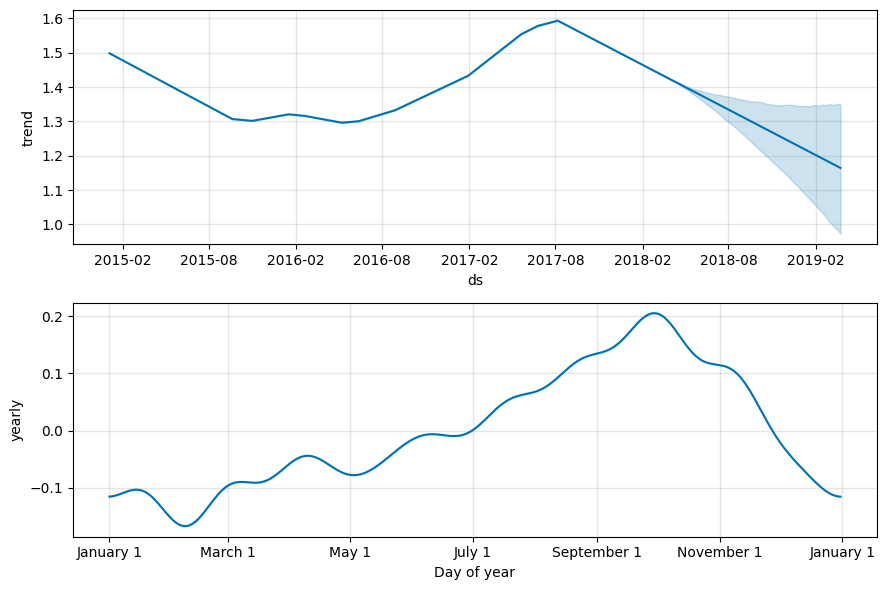

In [18]:
figure = m.plot_components(forecast)

In [37]:
df_wst = df[df['region']=='West'].rename(columns={"Date":'ds',"AveragePrice":'y'})
df_wst.head(4)

,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West


In [38]:
plt.figure(figsize=(20,10))
plt.plot(df_wst['Date'],df_wst['AveragePrice'])

KeyError: 'Date'

<Figure size 2000x1000 with 0 Axes>

In [39]:
m = Prophet()
m.fit(df_wst)

20:04:26 - cmdstanpy - INFO - Chain [1] start processing
20:04:26 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.286987,0.661515,1.546846,1.286987,1.286987,-0.188635,-0.188635,-0.188635,-0.188635,-0.188635,-0.188635,0.0,0.0,0.0,1.098352
1,2015-01-11,1.284739,0.665271,1.512991,1.284739,1.284739,-0.172913,-0.172913,-0.172913,-0.172913,-0.172913,-0.172913,0.0,0.0,0.0,1.111826
2,2015-01-18,1.282492,0.686006,1.533291,1.282492,1.282492,-0.164403,-0.164403,-0.164403,-0.164403,-0.164403,-0.164403,0.0,0.0,0.0,1.118090
3,2015-01-25,1.280245,0.698576,1.532044,1.280245,1.280245,-0.175698,-0.175698,-0.175698,-0.175698,-0.175698,-0.175698,0.0,0.0,0.0,1.104547
4,2015-02-01,1.277998,0.650440,1.496270,1.277998,1.277998,-0.196759,-0.196759,-0.196759,-0.196759,-0.196759,-0.196759,0.0,0.0,0.0,1.081239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.726270,1.090541,1.972189,1.689641,1.760811,-0.208519,-0.208519,-0.208519,-0.208519,-0.208519,-0.208519,0.0,0.0,0.0,1.517751
530,2019-03-22,1.726831,1.065496,1.987967,1.690085,1.761473,-0.203472,-0.203472,-0.203472,-0.203472,-0.203472,-0.203472,0.0,0.0,0.0,1.523359
531,2019-03-23,1.727391,1.114723,1.965453,1.690529,1.762199,-0.197851,-0.197851,-0.197851,-0.197851,-0.197851,-0.197851,0.0,0.0,0.0,1.529540
532,2019-03-24,1.727952,1.128002,1.976967,1.690974,1.762903,-0.191762,-0.191762,-0.191762,-0.191762,-0.191762,-0.191762,0.0,0.0,0.0,1.536189


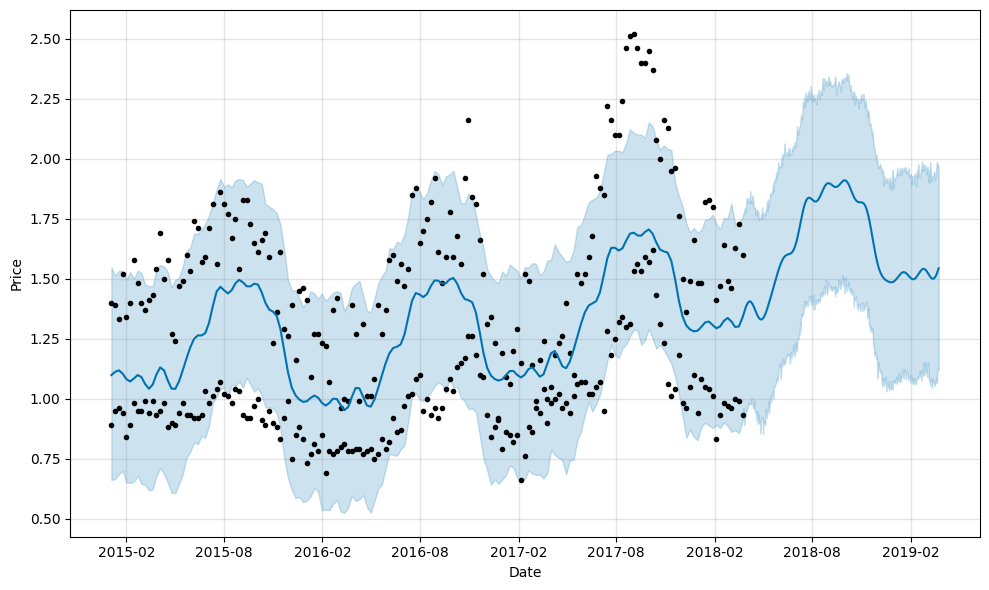

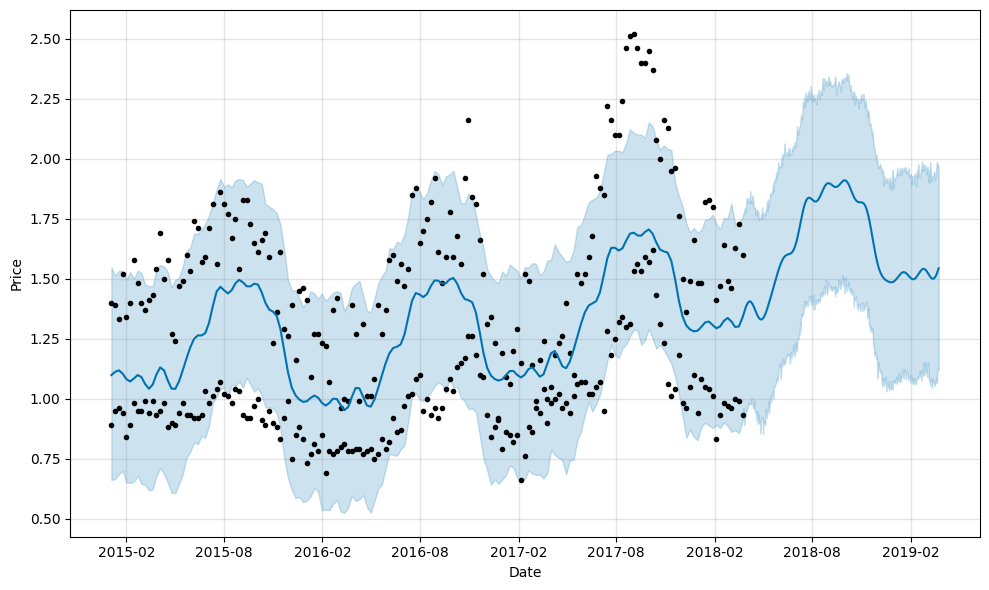

In [42]:
m.plot(forecast,xlabel='Date',ylabel='Price')